In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# loading train and test set
df1 = pd.read_csv('train1.csv')
df2= pd.read_csv('test.csv')
df11 = pd.read_csv('train1.csv')
df22= pd.read_csv('test.csv')
data = pd.concat([df1, df2])

In [7]:
df1.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [5]:
df1.isnull().sum()  # checking null values for train set

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
df2.isnull().sum()    # checking null values for test set

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [8]:
# filling null values of 'Item Weight' column with the median weight in train and test set
df1['Item_Weight'] = df1['Item_Weight'].replace(np.nan,df1['Item_Weight'].median())
df2['Item_Weight'] = df2['Item_Weight'].replace(np.nan,df2['Item_Weight'].median())

In [9]:
# filling null values of 'Outlet Size' with the mode size in train and test set
df1['Outlet_Size'].fillna(df1['Outlet_Size'].mode()[0], inplace = True)
df2['Outlet_Size'].fillna(df2['Outlet_Size'].mode()[0], inplace = True)

In [10]:
df1.isnull().sum() # No null values in train set

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [11]:
df2.isnull().sum()   # No null values in test set

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [12]:
# categorize fat content into 'Low Fat' and 'Regular' for train set  
df1['Item_Fat_Content'] = df1['Item_Fat_Content'].replace({'LF': 'Low Fat', 'reg': 'Regular', 'low fat': 'Low Fat'})
df1['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [13]:
# categorize fat content into 'Low Fat' and 'Regular' for test set  
df2['Item_Fat_Content'] = df2['Item_Fat_Content'].replace({'LF': 'Low Fat', 'reg': 'Regular', 'low fat': 'Low Fat'})
df2['Item_Fat_Content'].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

In [10]:
# categorize Item Identifier into 'Non consumables' , 'Drinks' and 'Foods' 
def item_identify(cols):
  item_id=cols[0]
  item_type=cols[1]
  
  if item_id[:2] == 'NC':
    return 'Non Consumables'
  elif item_id[:2] == 'DR':
    return 'Drinks'
  else:
    return 'Foods'

In [12]:
df1['Item_Type']=df1[['Item_Identifier','Item_Type']].apply(item_identify,axis=1)
df2['Item_Type']=df2[['Item_Identifier','Item_Type']].apply(item_identify,axis=1)

In [14]:
# there are many 0 values for this column
df1['Item_Visibility'].value_counts()

0.000000    526
0.076975      3
0.041283      2
0.085622      2
0.187841      2
           ... 
0.092576      1
0.067544      1
0.115168      1
0.146896      1
0.050902      1
Name: Item_Visibility, Length: 7880, dtype: int64

In [15]:
# replacing the 0 values with average value of the column for train set
df1['Item_Visibility'].mask(df1['Item_Visibility']==0,df1['Item_Visibility'].mean(),inplace = True)
df1['Item_Visibility'].value_counts().head()

0.066132    526
0.076975      3
0.096592      2
0.104784      2
0.058919      2
Name: Item_Visibility, dtype: int64

In [16]:
# replacing the 0 values with average value of the column for test set
df2['Item_Visibility'].mask(df2['Item_Visibility']==0,df2['Item_Visibility'].mean(),inplace = True)
df2['Item_Visibility'].value_counts().head()

0.065684    353
0.084862      2
0.159195      2
0.014017      2
0.103864      2
Name: Item_Visibility, dtype: int64

In [17]:
# replacing the 'Outlet_Establishment_Year' column with 'Years_of_operation' from established year till 2013
def num_years(col):
    return 2013-col
df1['Years_of_operation'] = df1['Outlet_Establishment_Year'].apply(num_years)
df2['Years_of_operation'] = df2['Outlet_Establishment_Year'].apply(num_years)

In [18]:
df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_of_operation
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,15
4,NCD19,8.93,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,26


In [17]:
# create dummy value both for train and test set
item_fat_content=pd.get_dummies(df1['Item_Fat_Content'])
item_type=pd.get_dummies(df1['Item_Type'])
outlet_size=pd.get_dummies(df1['Outlet_Size'])
outlet_location_type=pd.get_dummies(df1['Outlet_Location_Type'])
output_type=pd.get_dummies(df1['Outlet_Type'])

item_fat_content_test=pd.get_dummies(df2['Item_Fat_Content'])
item_type_test=pd.get_dummies(df2['Item_Type'])
outlet_size_test=pd.get_dummies(df2['Outlet_Size'])
outlet_location_type_test=pd.get_dummies(df2['Outlet_Location_Type'])
output_type_test=pd.get_dummies(df2['Outlet_Type'])

In [19]:
# add all dummy into df1 and df2
df1=pd.concat([df1,item_fat_content,item_type,outlet_size,outlet_location_type,output_type],axis=1)

df2=pd.concat([df2,item_fat_content_test,item_type_test,outlet_size_test,outlet_location_type_test,output_type_test],axis=1)

In [29]:
df2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,...,High,Medium,Small,Tier 1,Tier 2,Tier 3,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,FDW58,20.750,Low Fat,0.007565,Foods,107.8622,OUT049,1999,Medium,Tier 1,...,0,1,0,1,0,0,0,1,0,0
1,FDW14,8.300,Regular,0.038428,Foods,87.3198,OUT017,2007,Medium,Tier 2,...,0,1,0,0,1,0,0,1,0,0
2,NCN55,14.600,Low Fat,0.099575,Non Consumables,241.7538,OUT010,1998,Medium,Tier 3,...,0,1,0,0,0,1,1,0,0,0
3,FDQ58,7.315,Low Fat,0.015388,Foods,155.0340,OUT017,2007,Medium,Tier 2,...,0,1,0,0,1,0,0,1,0,0
4,FDY38,12.500,Regular,0.118599,Foods,234.2300,OUT027,1985,Medium,Tier 3,...,0,1,0,0,0,1,0,0,0,1


In [28]:
df1 = df1.drop(['Item_Identifier' , 'Item_Fat_Content' , 'Item_Type' , 'Outlet_Identifier' , 
               'Outlet_Establishment_Year' , 'Outlet_Location_Type' , 'Outlet_Size' , 'Outlet_Type' ] , axis=1)

In [32]:
df1.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Years_of_operation,Low Fat,Regular,Drinks,Foods,Non Consumables,High,Medium,Small,Tier 1,Tier 2,Tier 3,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,9.30,0.016047,249.8092,3735.1380,14,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,443.4228,4,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,2097.2700,14,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0
3,19.20,0.066132,182.0950,732.3800,15,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0
4,8.93,0.066132,53.8614,994.7052,26,1,0,0,0,1,1,0,0,0,0,1,0,1,0,0


In [33]:
df2 = df2.drop(['Item_Identifier' , 'Item_Fat_Content' , 'Item_Type' , 'Outlet_Identifier' , 
               'Outlet_Establishment_Year' , 'Outlet_Location_Type' , 'Outlet_Size' ,'Outlet_Type' ] , axis=1)

In [75]:
df1.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Years_of_operation,Low Fat,Regular,Drinks,Foods,Non Consumables,High,Medium,Small,Tier 1,Tier 2,Tier 3,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,9.30,0.016047,249.8092,3735.1380,14,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,443.4228,4,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,2097.2700,14,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0
3,19.20,0.066132,182.0950,732.3800,15,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0
4,8.93,0.066132,53.8614,994.7052,26,1,0,0,0,1,1,0,0,0,0,1,0,1,0,0


In [36]:
# categorize x and y  
x=df1.drop(['Item_Outlet_Sales'],axis=1)
y=df1['Item_Outlet_Sales']
x_test = df2

In [37]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
x = scalar.fit_transform(x)

x_test = scalar.fit_transform(x_test)

In [41]:
# train test split
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.2,)

In [53]:
# Linear Regression
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(x_train,y_train)

LinearRegression()

In [54]:
prediction = model.predict(x_val)
print (prediction)

[ 707.41846254   -5.08153746 1984.91846254 ...  682.91846254 1688.41846254
 2748.41846254]


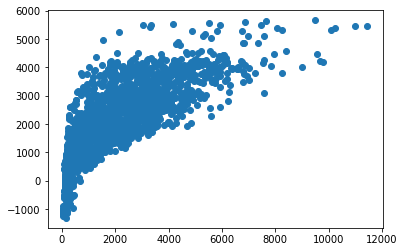

In [55]:
plt.scatter(y_val, prediction)

In [66]:
rf_accuracy1 = round(model1.score(x_train,y_train),2)
rf_accuracy1

0.56

In [57]:
# RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor(n_estimators=400,max_depth=6, min_samples_leaf=76,n_jobs=4)
model2.fit(x_train,y_train)

RandomForestRegressor(max_depth=6, min_samples_leaf=76, n_estimators=400,
                      n_jobs=4)

In [67]:
rf_accuracy2 = round(model2.score(x_train,y_train),2)
rf_accuracy2

0.61

In [63]:
# DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
model3 = DecisionTreeRegressor(max_depth=15,min_samples_leaf=300)
model3.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=15, min_samples_leaf=300)

In [68]:
rf_accuracy3 = round(model3.score(x_train,y_train),2)
rf_accuracy3

0.58

In [71]:
# Support Vector Regression
from sklearn.svm import SVR

model4 = SVR()
model4.fit(x_train, y_train)

SVR()

In [72]:
rf_accuracy4 = round(model4.score(x_train,y_train),2)
rf_accuracy4

0.03

In [77]:
# RandomForestRegressor model gave the best accuracy. Lets predict test set
ypred1 = model1.predict(x_test)
print (ypred1)

[3.81943931e+11 7.70233601e+10 1.90565599e+13 ... 1.90567437e+13
 7.70233621e+10 7.70233598e+10]


In [88]:
ypred2 = model2.predict(x_test)
print (ypred2)

[1691.69884707 1379.02669015  584.09610551 ... 1895.47639565 3544.16470069
 1307.59372111]


In [89]:
ypred2

array([1691.69884707, 1379.02669015,  584.09610551, ..., 1895.47639565,
       3544.16470069, 1307.59372111])

In [86]:
# Create submission file 
output_df = pd.DataFrame({'Item_Identifier' : df22['Item_Identifier'].values ,
                          'Outlet_Identifier' : df22['Outlet_Identifier'].values})
output_df['Item_Outlet_Sales'] = ypred2

In [87]:
output_df.to_csv('D MartSubmission.csv' , index=False)